In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os 
import pathlib 
from tensorflow.keras.applications import imagenet_utils


### LOADING DATASET

In [3]:
path = pathlib.Path("/Users/abdulbarisoylemez/Documents/Visual Code/Yapay Zeka ve Bilgisayarlı Görü Mühendisi/TensorFlow_ile_Model_Egitimi/cicekler")


In [4]:
Ayçiçeği = list(path.glob('Ayçiçeği/*'))[:500]
Gül = list(path.glob('Gül/*'))[:500]
Karahindiba = list(path.glob('Karahindiba/*'))[:500]
Lale = list(path.glob('Lale/*'))[:500]
Papatya = list(path.glob('Papatya/*'))[:500]
Süsen = list(path.glob('Süsen/*'))[:500]


In [5]:
data = {
    'Ayçiçeği' : Ayçiçeği,
    'Gül' : Gül,
    'Karahindiba' : Karahindiba,
    'Lale' : Lale,
    'Papatya': Papatya,
    'Süsen': Süsen
}
flower_labels= {k:v for k,v in enumerate(data.keys())}

### Visualization

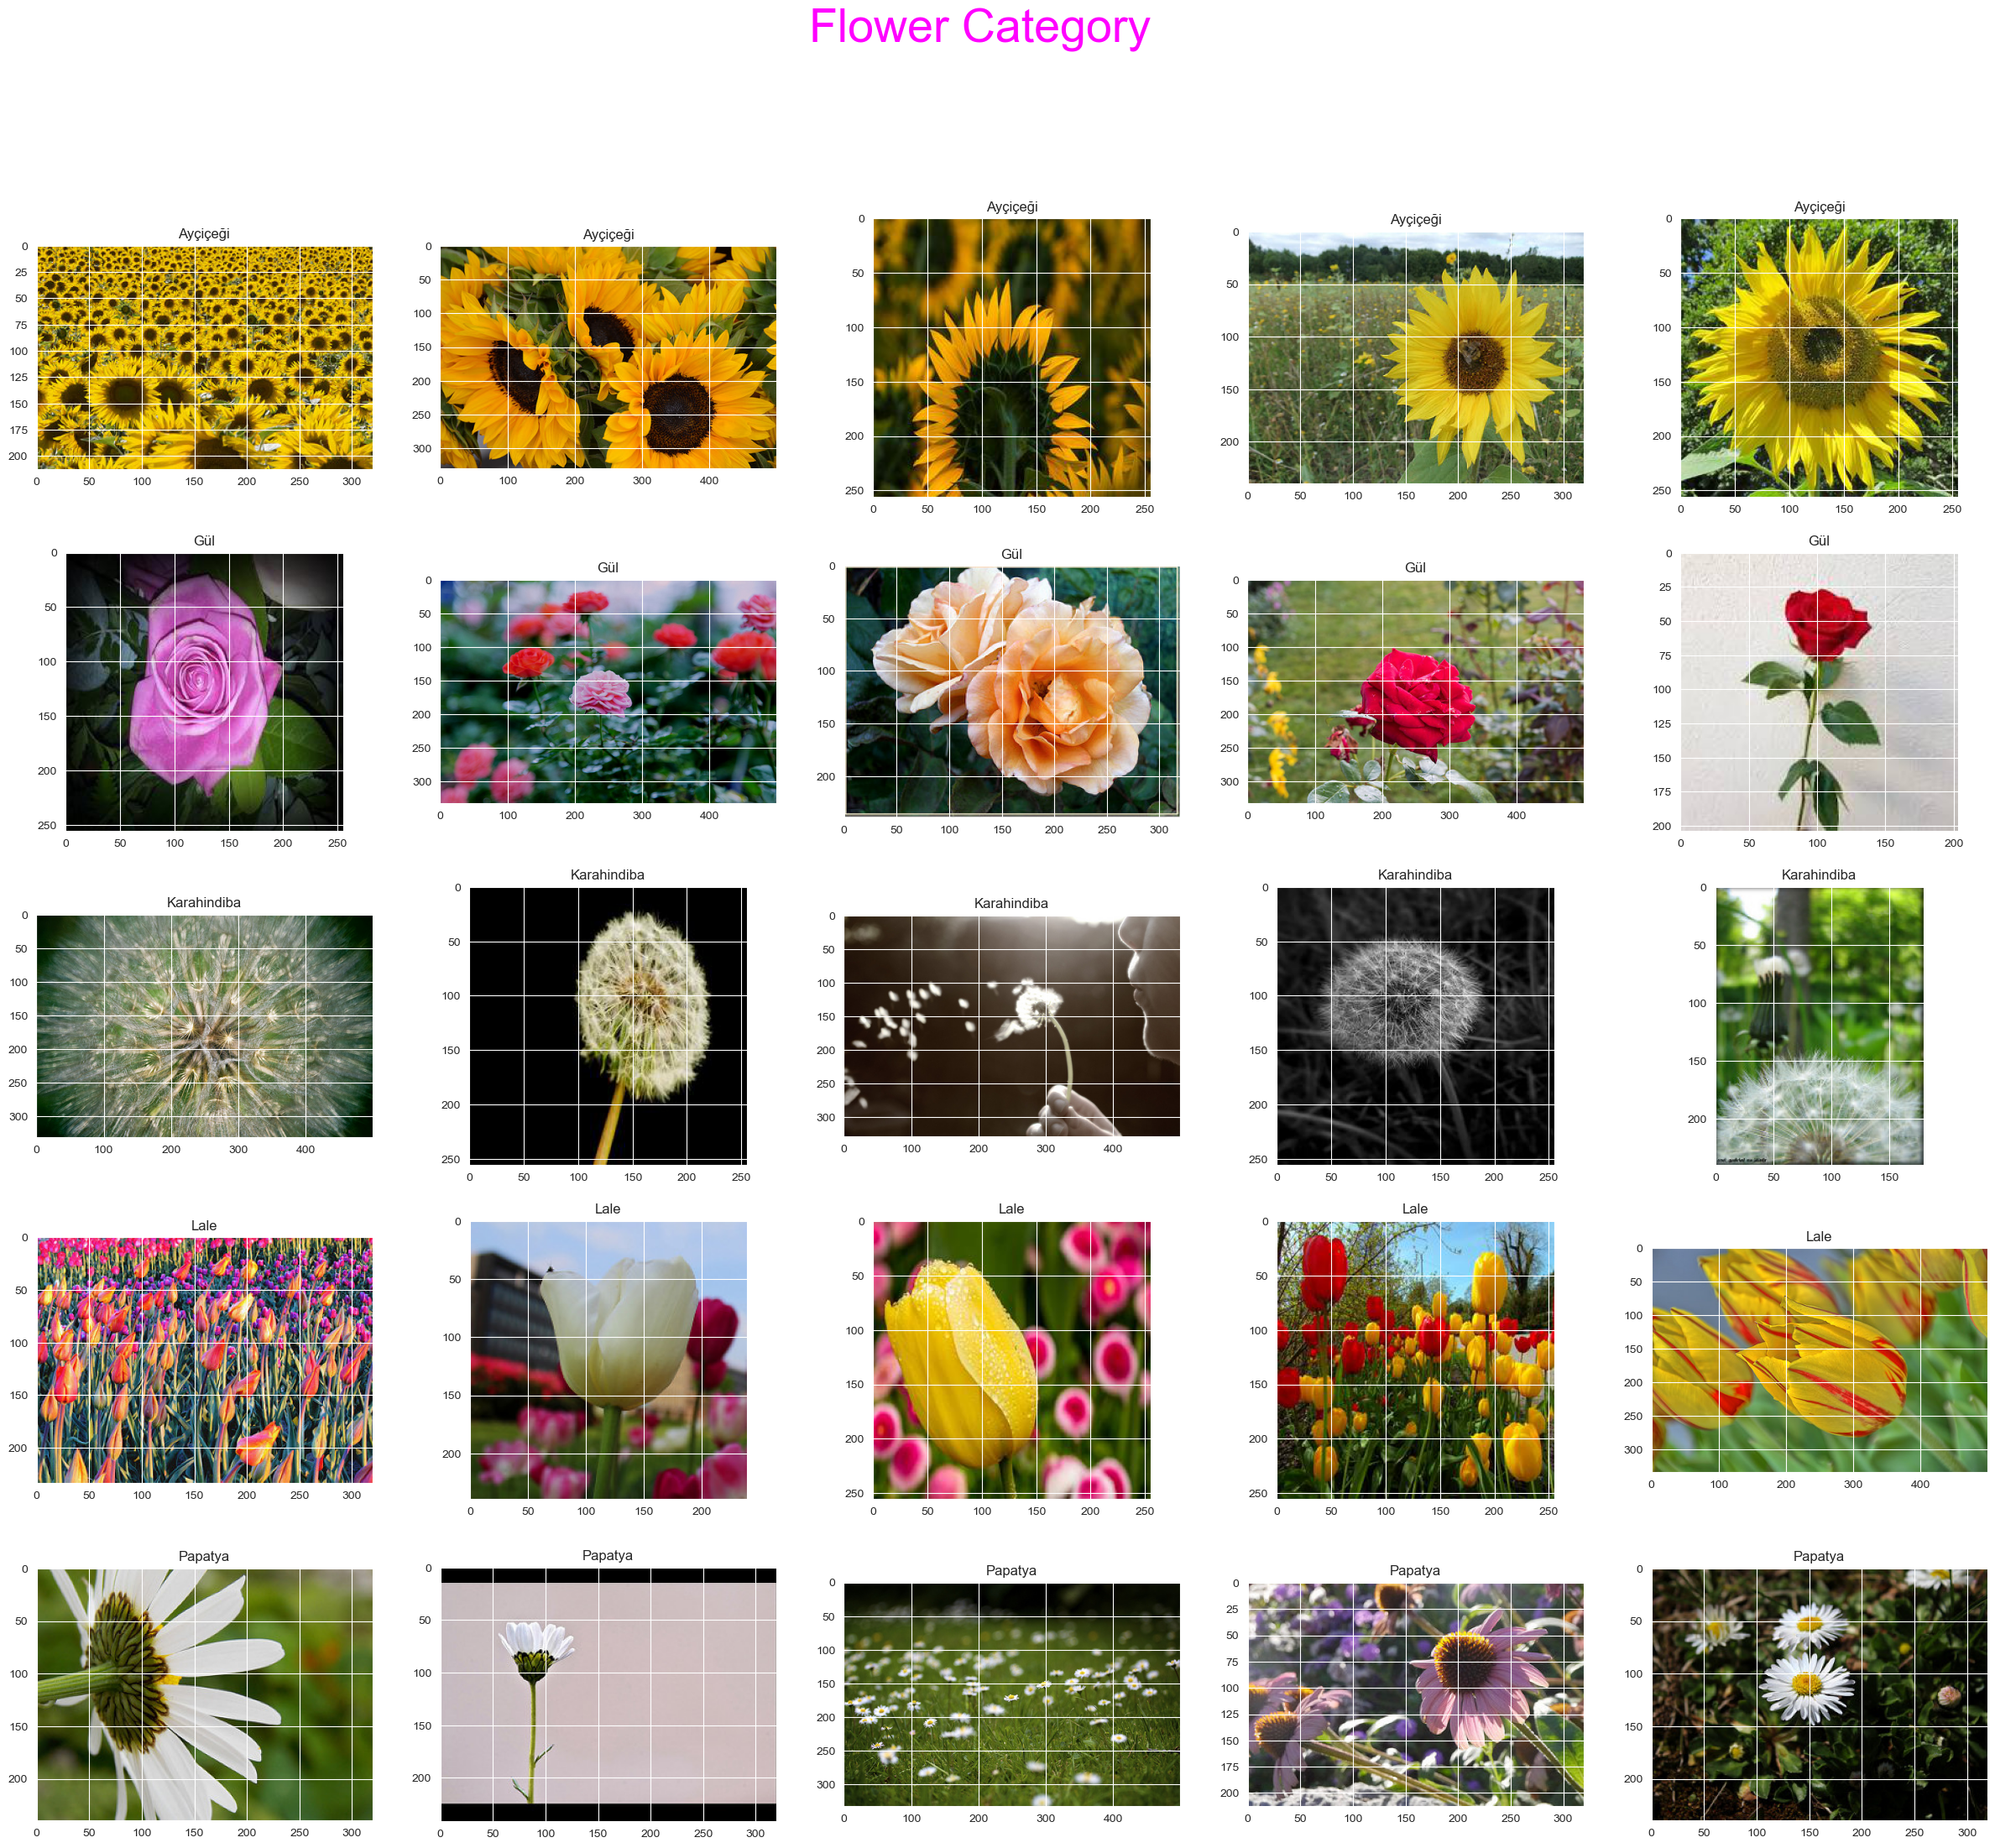

In [6]:
fig, ax = plt.subplots(5,5, figsize=(30,25))
fig.suptitle('Flower Category',color='magenta',fontsize=40)
for i in range(5):
    for j in range(5):
        image = img.imread(data.get(flower_labels.get(i))[j])
        ax[i, j].imshow(image)
        ax[i, j].set_title(flower_labels.get(i))

### Train & Test Definition

In [7]:
train_gen=ImageDataGenerator(rotation_range=10,
                                rescale = 1./255,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=False,
                                zoom_range=0.1,
                                shear_range=0.1,
                                brightness_range=[0.8, 1.2],
                                fill_mode='nearest',
                                validation_split=0.2  # set validation split to 20% 
                                )
train_data=train_gen.flow_from_directory("/Users/abdulbarisoylemez/Documents/Visual Code/Yapay Zeka ve Bilgisayarlı Görü Mühendisi/TensorFlow_ile_Model_Egitimi/cicekler",target_size=(224,224),batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True,
                                         subset='training')
test_data=train_gen.flow_from_directory("/Users/abdulbarisoylemez/Documents/Visual Code/Yapay Zeka ve Bilgisayarlı Görü Mühendisi/TensorFlow_ile_Model_Egitimi/cicekler",target_size=(224,224),batch_size=1,
                                        shuffle=False,subset='validation')

Found 2400 images belonging to 6 classes.
Found 599 images belonging to 6 classes.


### Creating CNN Model

In [8]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

In [52]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                            padding='valid', activation='relu', input_shape=(224, 224, 3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(90, activation='relu'))
cnn.add(keras.layers.Dense(15, activation='relu'))
cnn.add(keras.layers.Dropout(rate=0.1, seed=100))
cnn.add(keras.layers.Dense(units=6, activation='sigmoid'))


In [53]:
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 394272)            0         
                                                                 
 dense_26 (Dense)            (None, 90)                35484570  
                                                                 
 dense_27 (Dense)            (None, 15)                1365      
                                                                 
 dropout_8 (Dropout)         (None, 15)                0         
                                                      

In [54]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [55]:
cnn.fit(train_data,epochs=20,validation_data=test_data,shuffle=True,
         callbacks=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10))

Epoch 1/20


2023-12-08 02:19:07.094482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


75/75 [==============================] - ETA: 0s - loss: 4.1439 - accuracy: 0.3546

2023-12-08 02:19:28.915875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


75/75 [==============================] - 27s 348ms/step - loss: 4.1439 - accuracy: 0.3546 - val_loss: 1.3533 - val_accuracy: 0.4841
Epoch 2/20
75/75 [==============================] - 26s 344ms/step - loss: 1.2594 - accuracy: 0.5567 - val_loss: 1.2136 - val_accuracy: 0.5860
Epoch 3/20
75/75 [==============================] - 26s 342ms/step - loss: 1.1318 - accuracy: 0.6117 - val_loss: 1.2591 - val_accuracy: 0.5509
Epoch 4/20
75/75 [==============================] - 26s 341ms/step - loss: 1.1121 - accuracy: 0.6142 - val_loss: 1.1667 - val_accuracy: 0.5960
Epoch 5/20
75/75 [==============================] - 25s 336ms/step - loss: 1.0532 - accuracy: 0.6429 - val_loss: 1.0910 - val_accuracy: 0.6127
Epoch 6/20
75/75 [==============================] - 25s 338ms/step - loss: 0.9740 - accuracy: 0.6650 - val_loss: 1.1084 - val_accuracy: 0.6194
Epoch 7/20
75/75 [==============================] - 25s 337ms/step - loss: 0.9438 - accuracy: 0.6583 - val_loss: 1.0774 - val_accuracy: 0.6477
Epoch 8/20

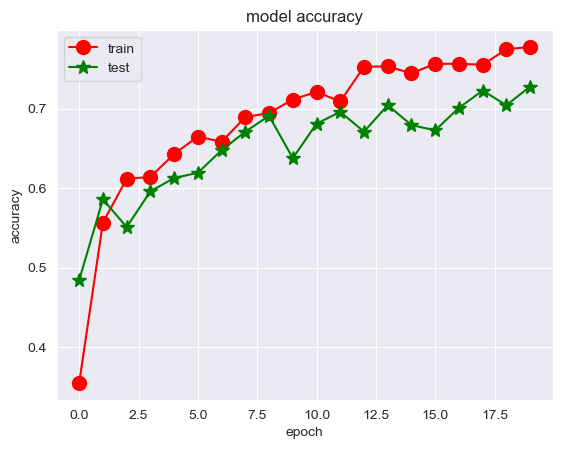

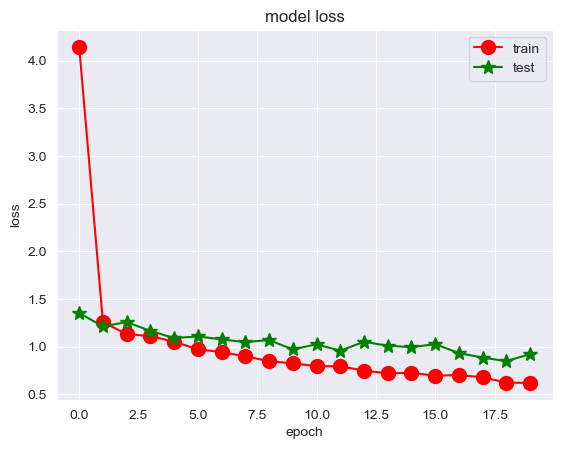

In [56]:
plot(cnn)

In [16]:
y_pred = cnn.predict(test_data)
main_y_pred = np.argmax(y_pred, axis=1)

 15/599 [..............................] - ETA: 4s

2023-12-08 01:42:20.781687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


599/599 [==============================] - 4s 7ms/step


In [17]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = cnn.predict_generator(test_data, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

2023-12-08 01:42:27.830706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [18]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

 Ayçiçeği       0.80      0.91      0.85        99
        Gül       0.57      0.67      0.62       100
 Karahindiba       0.71      0.83      0.76       100
        Lale       0.67      0.66      0.67       100
     Papatya       0.76      0.61      0.68       100
      Süsen       0.88      0.66      0.75       100

    accuracy                           0.72       599
   macro avg       0.73      0.72      0.72       599
weighted avg       0.73      0.72      0.72       599



array([[90,  5,  0,  2,  2,  0],
       [ 1, 67,  3, 20,  5,  4],
       [ 2,  5, 83,  4,  6,  0],
       [ 9, 21,  0, 66,  3,  1],
       [10,  4, 20,  1, 61,  4],
       [ 0, 15, 11,  5,  3, 66]])

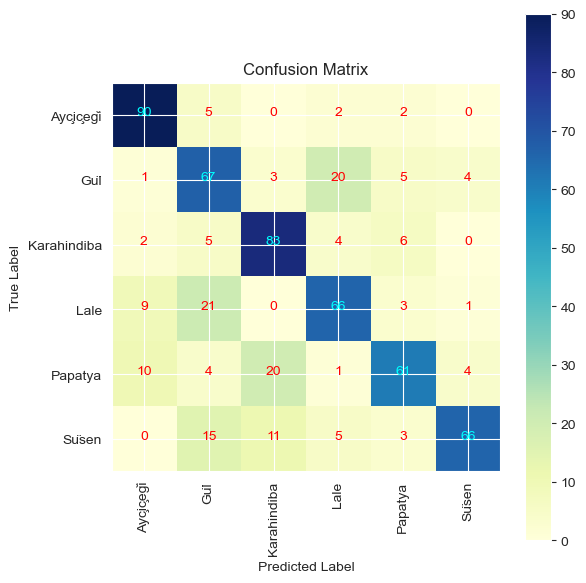

In [19]:
cm = confusion_matrix(test_data.classes, predicted_classes)
d1=test_data.class_indices
classes = list(d1.keys())
cmap= plt.cm.YlGnBu
plt.figure(figsize= (6, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
plt.title('Confusion Matrix')
plt.colorbar(shrink=True)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 90)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'aqua' if cm[i, j] > thresh else 'red')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
cm

In [20]:
train_score = cnn.evaluate(train_data, verbose= 1)
test_score = cnn.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

2023-12-08 01:44:48.180617: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 22/599 [>.............................] - ETA: 4s - loss: 0.1024 - accuracy: 1.0000

2023-12-08 01:45:05.434968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


599/599 [==============================] - 5s 8ms/step - loss: 0.7869 - accuracy: 0.7396
Train Loss:  0.5027276873588562
Train Accuracy:  0.8308333158493042
*****************************
Test Loss:  0.7869194149971008
Test Accuracy:  0.7395659685134888
